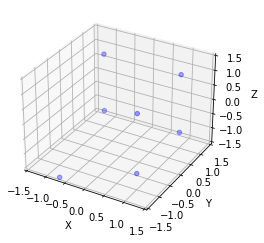

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


# Vertices of a cube centered at the origin with edge length of 2
vertices_points = np.array([
    [-1, -1, -2],
    [-1, -17,  1],
    [-1,  1, -1],
    [-1,  1,  1],
    [ 1, -1, -1],
    [ 1, -1,  1],
    [ 1,  1, -1],
    [ 1,  1,  1]
])

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the vertices
ax.scatter(vertices_points[:, 0], vertices_points[:, 1], vertices_points[:, 2], color='b')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the limits of the plot
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])

# Show the plot
plt.show()


In [28]:
import scipy.spatial as ss

In [29]:
convex_hull_cube = ss.ConvexHull(vertices_points)

In [30]:
vertices_points[convex_hull_cube.simplices]

array([[[ -1, -17,   1],
        [  1,  -1,  -1],
        [ -1,  -1,  -2]],

       [[  1,   1,  -1],
        [  1,  -1,  -1],
        [ -1,  -1,  -2]],

       [[  1,   1,  -1],
        [ -1,   1,  -1],
        [ -1,  -1,  -2]],

       [[  1,  -1,   1],
        [ -1, -17,   1],
        [  1,  -1,  -1]],

       [[  1,  -1,   1],
        [  1,   1,  -1],
        [  1,   1,   1]],

       [[  1,  -1,   1],
        [  1,   1,  -1],
        [  1,  -1,  -1]],

       [[ -1,   1,   1],
        [ -1,   1,  -1],
        [ -1,  -1,  -2]],

       [[ -1,   1,   1],
        [ -1, -17,   1],
        [ -1,  -1,  -2]],

       [[ -1,   1,   1],
        [  1,  -1,   1],
        [  1,   1,   1]],

       [[ -1,   1,   1],
        [  1,  -1,   1],
        [ -1, -17,   1]],

       [[ -1,   1,   1],
        [  1,   1,  -1],
        [  1,   1,   1]],

       [[ -1,   1,   1],
        [  1,   1,  -1],
        [ -1,   1,  -1]]])

In [31]:
delaunay_cube = ss.Delaunay(vertices_points[convex_hull_cube.vertices])

In [32]:
delaunay_cube.simplices

array([[6, 2, 4, 0],
       [5, 1, 4, 0],
       [5, 3, 1, 0],
       [5, 3, 2, 4],
       [5, 2, 4, 0],
       [5, 3, 2, 0],
       [7, 3, 2, 4],
       [7, 5, 3, 4],
       [7, 6, 2, 4]], dtype=int32)

In [33]:
vertices_points[delaunay_cube.simplices]

array([[[  1,   1,  -1],
        [ -1,   1,  -1],
        [  1,  -1,  -1],
        [ -1,  -1,  -2]],

       [[  1,  -1,   1],
        [ -1, -17,   1],
        [  1,  -1,  -1],
        [ -1,  -1,  -2]],

       [[  1,  -1,   1],
        [ -1,   1,   1],
        [ -1, -17,   1],
        [ -1,  -1,  -2]],

       [[  1,  -1,   1],
        [ -1,   1,   1],
        [ -1,   1,  -1],
        [  1,  -1,  -1]],

       [[  1,  -1,   1],
        [ -1,   1,  -1],
        [  1,  -1,  -1],
        [ -1,  -1,  -2]],

       [[  1,  -1,   1],
        [ -1,   1,   1],
        [ -1,   1,  -1],
        [ -1,  -1,  -2]],

       [[  1,   1,   1],
        [ -1,   1,   1],
        [ -1,   1,  -1],
        [  1,  -1,  -1]],

       [[  1,   1,   1],
        [  1,  -1,   1],
        [ -1,   1,   1],
        [  1,  -1,  -1]],

       [[  1,   1,   1],
        [  1,   1,  -1],
        [ -1,   1,  -1],
        [  1,  -1,  -1]]])

In [40]:
import numpy as np
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import plotly.graph_objects as go

# Generate random points in 3D
points = vertices_points  # 30 random points in 3D

# Compute the convex hull
hull = delaunay_cube = ss.Delaunay(vertices_points[convex_hull_cube.vertices])

fig = go.Figure()




# Add the points
"""
fig.add_trace(go.Scatter3d(
    x=intersections[:, 0], y=intersections[:, 1], z=intersections[:, 2],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Points'
))"""

# Add the convex hull
for simplex in hull.simplices:
    fig.add_trace(go.Mesh3d(
        x=vertices_points[simplex, 0],
        y=vertices_points[simplex, 1],
        z=vertices_points[simplex, 2],
        color='cyan',
        opacity=0.5,
        name='Convex Hull'
    ))
"""
# Add a specific point (321, -12, 29) in red
fig.add_trace(go.Scatter3d(
    x=[321], y=[-12], z=[29],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Special Point'
))"""

# Set the title and labels
fig.update_layout(
    title='3D Convex Hull',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

# Show plot
fig.show()

In [6]:
#https://stackoverflow.com/questions/16750618/whats-an-efficient-way-to-find-if-a-point-lies-in-the-convex-hull-of-a-point-cl#:~:text=For%20each%20of%20the%20edges,it%20lies%20outside%20the%20polygon.

In [23]:
def point_in_hull(point, hull, tolerance=1e-12):
    return all(
        (np.dot(eq[:-1], point) + eq[-1] <= tolerance)
        for eq in hull.equations)

In [24]:
# Generate a million random points between -1 and 1
points = np.random.uniform(-1, 1, (50000, 3))

print(points)


[[ 5.98215039e-01 -1.59051831e-01 -4.60483173e-04]
 [ 7.06549423e-01 -3.85591026e-01 -8.59409578e-01]
 [-4.61971646e-01 -9.61627761e-01 -4.30657058e-01]
 ...
 [-6.89541010e-01 -3.93385855e-01  8.70891053e-01]
 [-8.42094017e-01  2.35376278e-02  9.40743636e-01]
 [-6.64813535e-01  6.44455237e-01  5.92088851e-01]]


In [25]:
for point in points:
    return_val = point_in_hull(point,convex_hull_cube)
    if return_val == False:
        print(point)

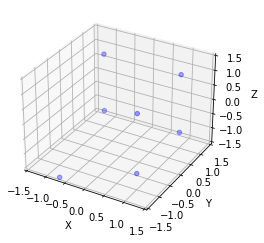

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


# Vertices of a cube centered at the origin with edge length of 2
vertices = np.array([
    [-1, -1, -2],
    [-1, -17,  1],
    [-1,  1, -1],
    [-1,  1,  1],
    [ 1, -1, -1],
    [ 1, -1,  1],
    [ 1,  1, -1],
    [ 1,  1,  1]
])

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the vertices
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='b')
#ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='g')


# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the limits of the plot
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])

# Show the plot
plt.show()


In [11]:
return_val = point_in_hull(np.array([-3,0,0]),convex_hull_cube)

In [12]:
return_val

False